In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
import joblib

1\. Import Data

In [128]:
data = pd.read_csv('theDataset/Youtube03-LMFAO.csv')

data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
# CONTENT / CLASS


2. PreProceessing

In [129]:
data["CONTENT"].value_counts()


Check out this video on YouTube:﻿                   74
Check out this playlist on YouTube:﻿                15
Love this song makes me wanna dance! ﻿               3
Check out this playlist on YouTube:<br /><br />﻿     2
everyday I&#39;m shufflin﻿                           2
                                                    ..
this song is fu cking awesom!!!!!!!﻿                 1
never gets old﻿                                      1
Party time!﻿                                         1
Damn, this was everywhere﻿                           1
NICE :3﻿                                             1
Name: CONTENT, Length: 340, dtype: int64

In [130]:
data['CONTENT'] = data['CONTENT'].str.lower()

In [131]:
data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')

C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_7592\3125199810.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')


2. Stop Words 

In [132]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Abdel
[nltk_data]     Alim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
stop_words = set(stopwords.words('english'))

In [135]:
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_stop(x))

In [81]:
data['CONTENT'] = data['CONTENT'].str.replace(r'[^\w\s]',' ')

C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_7592\1734438751.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x['CONTENT'] = x['CONTENT'].str.replace(r'[^\w\s]',' ')


In [82]:
def remove_multiple_spaces(x):
    return " ".join([word for word in str(x).split()])
data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_multiple_spaces(x))

In [144]:
data = data.drop_duplicates(subset='CONTENT', keep='first')

In [145]:
x = data['CONTENT']
y = data['CLASS']

In [146]:
# convert sting to numbers 
vectorizer = CountVectorizer( )
featuers = vectorizer.fit_transform(x)
print(featuers)

  (0, 371)	1
  (0, 372)	1
  (0, 851)	1
  (0, 865)	1
  (0, 10)	1
  (0, 104)	1
  (0, 555)	1
  (1, 835)	1
  (1, 298)	1
  (2, 371)	1
  (2, 355)	1
  (2, 335)	1
  (2, 23)	2
  (2, 374)	2
  (2, 119)	9
  (2, 127)	1
  (2, 211)	1
  (2, 815)	2
  (2, 658)	1
  (2, 295)	2
  (2, 311)	1
  (2, 61)	1
  (2, 502)	1
  (2, 732)	2
  (2, 230)	1
  :	:
  (330, 469)	1
  (330, 689)	1
  (330, 455)	1
  (330, 463)	1
  (330, 763)	1
  (330, 84)	1
  (330, 587)	1
  (330, 803)	1
  (330, 259)	1
  (330, 520)	1
  (330, 613)	1
  (330, 357)	1
  (330, 310)	1
  (330, 476)	1
  (330, 574)	1
  (330, 824)	1
  (330, 771)	1
  (330, 208)	1
  (330, 529)	1
  (331, 763)	1
  (331, 472)	1
  (331, 191)	1
  (331, 462)	1
  (331, 644)	1
  (332, 522)	1


In [147]:
modle = KNeighborsClassifier(n_neighbors=3)
X_main, X_test,y_main, y_test = train_test_split(featuers,y ,
                                   test_size = 0.2, 
                                   shuffle = True)
X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                                   test_size = 0.16,
                                   shuffle = True)


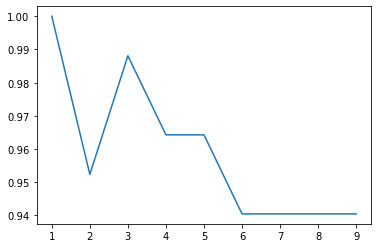

In [195]:
a = []
b =  range(1,10)
for i in b:
    modle = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    modle.fit(X_train, y_train)
    y_predict = modle.predict(bestX_test)
    
    a.append(accuracy_score(y_predict, besty_test)) 
plt.plot(b, a)

In [174]:
a = []
modle = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
iter =10000
maxacurssy = 0.89
bestX_train, bestX_test,besty_train,besty_test = X_train, X_validat,y_train, y_validat

for i in range(iter):
    X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                                   test_size = 0.16,
                                   shuffle = True)
    modle.fit(X_train, y_train)
    accuracy = modle.score(X_validat,y_validat)
    a.append(accuracy)
    if maxacurssy <accuracy:
        joblib.dump(modle,'nahini.joblib')
        maxacurssy = accuracy
        print(maxacurssy)
        bestX_train, bestX_test,besty_train,besty_test = X_train, X_validat,y_train, y_validat

0.9069767441860465
0.9302325581395349
0.9534883720930233
0.9767441860465116
1.0


In [161]:
modle.fit(bestX_train, besty_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [162]:
y_predict = modle.predict(X_test)
print(accuracy_score(y_predict, y_test))

0.9166666666666666


In [191]:
a = []
modle = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
iter =10000
maxacurssy = 0.89
bestX_train, bestX_test,besty_train,besty_test = X_train, X_test,y_train, y_test 
for i in range(iter):
    X_train, X_test,y_train, y_test = train_test_split(featuers,y ,
                                   test_size=0.25,
                                   shuffle=True)
    modle.fit(X_train, y_train)
    accuracy = modle.score(X_test,y_test)
    a.append(accuracy)
    if maxacurssy <accuracy:
        joblib.dump(modle,'nahini.joblib')
        maxacurssy = accuracy
        print(maxacurssy)
        bestX_train, bestX_test, besty_train, besty_test = X_train, X_test, y_train, y_test

0.9047619047619048
0.9166666666666666
0.9285714285714286
0.9523809523809523
0.9642857142857143
0.9761904761904762


In [194]:
ap = np.array(a)
print(ap.mean())

0.8691416666666666


In [196]:
y_predict = modle.predict(X_test)

print(accuracy_score(y_predict, y_test))

0.8690476190476191


In [19]:
def predictWithKnn(x, model, vectorizer):
    
    featuerspre = vectorizer.transform([str(x)])
    y_pred = modle.predict(x)
    return y_pred